# M2 Preprocessing on Debbie's Filtered dataset

## Add metadata to Anndata 

so we can see which cells match with Debbie's analysis. 


In [1]:
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb

In [2]:
adata = sc.read_h5ad('../../data/M2/adata_01.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 5165 × 15728
    obs: 'doublet_scores', 'predicted_doublets', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'mito', 'pct_dropout_by_counts', 'ambient'
    uns: 'clusters_gradients_colors', 'neighbors', 'pca', 'phase_colors', 'predicted_doublets_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'raw_counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [4]:
meta = pd.read_csv("../../metadata_final.csv", header = 0, index_col=0)

We'll count up how many cells are in M2, since the metadata file contains M1 and M2.

In [5]:
from collections import Counter

Counter([i.split('-')[1] for i in meta.index])

Counter({'1': 5060, '2': 4388})

In [6]:
meta_m2 = meta.loc[meta['sample'] == 2]

In [7]:
adata.obs['brcd'] = None

In [8]:
meta_m2['brcd'] = 0

In [9]:
for x in meta_m2.index:    
    for y in adata.obs.index:
        x_brcd = x.split('-')[0]
        y_brcd = y.split(':')[1][:-1]
        if x_brcd == y_brcd:
            meta_m2.loc[x,'brcd'] = x_brcd
            adata.obs.loc[y,'brcd'] = x_brcd


In [10]:
adata.obs

,doublet_scores,predicted_doublets,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,M,E,clusters_gradients,S_score,G2M_score,phase,cell_cycle_diff,brcd
CellID,,,,,,,,,,,,,,
gex_possorted_bam_1WGCZ:AAATGGCCATTGTCAGx,0.020408,False,728,2852,728.0,899.999939,-0.023509,-0.016567,E,-0.031664,0.070800,G2M,-0.102465,AAATGGCCATTGTCAG
gex_possorted_bam_1WGCZ:AACATTGTCTAGCGATx,0.033175,False,1521,5740,1521.0,899.408142,-0.025835,0.001678,E,-0.006757,-0.030665,G1,0.023908,AACATTGTCTAGCGAT
gex_possorted_bam_1WGCZ:AAAGGACGTAGACAAAx,0.098782,False,1221,4353,1221.0,899.262878,-0.031360,0.002192,E,-0.030586,-0.044247,G1,0.013661,AAAGGACGTAGACAAA
gex_possorted_bam_1WGCZ:AAAGCACCAATTGCGCx,0.030769,False,861,4208,861.0,899.999878,-0.016634,-0.006221,E,-0.028394,-0.001370,G1,-0.027025,AAAGCACCAATTGCGC
gex_possorted_bam_1WGCZ:AAACCAACAAGCTTATx,0.098782,False,1669,4995,1669.0,898.921448,0.002753,0.049891,E,0.004635,-0.004985,S,0.009620,AAACCAACAAGCTTAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_1WGCZ:TTTGTTGGTCACTCGCx,0.012939,False,1445,3483,1445.0,899.377258,-0.018805,0.021560,E,0.028106,0.017290,S,0.010816,None
gex_possorted_bam_1WGCZ:TTTGTGGCATGGCCCAx,0.013699,False,957,1898,957.0,900.000000,0.047368,-0.018366,M,0.032688,0.008938,S,0.023751,TTTGTGGCATGGCCCA
gex_possorted_bam_1WGCZ:TTTGTGTTCGGCCATAx,0.047445,False,785,4144,785.0,899.999939,-0.024466,0.003345,E,0.046011,0.015385,S,0.030627,TTTGTGTTCGGCCATA


In [11]:
meta_m2

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,barcode,...,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5,brcd
AAACAGCCACAGGGAC-2,SeuratProject,760,429,5214,2440,0.474255,0.03,9.331652,0.86,AAACAGCCACAGGGAC,...,0.939053,NE_3,-0.219722,1.158775,0.039616,-0.015865,S,NE_3,3,AAACAGCCACAGGGAC
AAACAGCCATGCATAT-2,SeuratProject,1771,1091,11431,5175,0.630870,0.46,7.916915,0.65,AAACAGCCATGCATAT,...,0.518453,NE_1,-0.166355,0.684809,0.020608,0.007212,S,NE_1,1,AAACAGCCATGCATAT
AAACATGCAAGGTAAC-2,SeuratProject,3891,1882,9379,4276,0.538420,0.12,7.765788,0.61,AAACATGCAAGGTAAC,...,0.760558,NE_4,-0.055452,0.816010,0.052821,-0.150962,S,NE_4,4,AAACATGCAAGGTAAC
AAACATGCACCTAAGC-2,SeuratProject,1505,830,9671,4614,0.657321,0.57,7.209584,0.46,AAACATGCACCTAAGC,...,-0.464544,NE_1,-0.166355,-0.298189,-0.074430,-0.065865,G1,NE_1,1,AAACATGCACCTAAGC
AAACATGCAGCCTAAC-2,SeuratProject,4147,1941,9218,4315,0.593595,0.30,7.786950,0.62,AAACATGCAGCCTAAC,...,0.150137,NE_7,0.665421,-0.515285,0.007803,-0.252885,S,NE_6,8,AAACATGCAGCCTAAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGTAAACCC-2,SeuratProject,4762,2105,19567,8201,0.552869,0.15,8.510162,0.77,TTTGTGAAGTAAACCC,...,0.850080,NE_1,-0.166355,1.016435,-0.195078,-0.295192,G1,NE_1,1,TTTGTGAAGTAAACCC
TTTGTGGCATGGCCCA-2,SeuratProject,2343,1406,10727,4826,0.500000,0.05,8.207792,0.71,TTTGTGGCATGGCCCA,...,-0.606037,NE_2,-0.194081,-0.411956,-0.079232,-0.091346,G1,NE_2,2,TTTGTGGCATGGCCCA
TTTGTGTTCCTTAGGG-2,SeuratProject,792,526,15868,7329,0.677008,0.65,3.640634,0.01,TTTGTGTTCCTTAGGG,...,0.828149,NE_3,-0.043944,0.872094,-0.054622,0.012500,G2M,NE_3,3,TTTGTGTTCCTTAGGG
TTTGTGTTCGGCCATA-2,SeuratProject,4272,1860,5745,2730,0.523573,0.09,8.322113,0.73,TTTGTGTTCGGCCATA,...,-0.536215,NE_2,-0.210300,-0.325915,0.131853,-0.259135,S,NE_1,2,TTTGTGTTCGGCCATA


In [12]:
new_adata_obs = adata.obs.merge(meta_m2, how = 'left',on='brcd')


In [13]:
new_adata_obs.index = adata.obs.index

In [14]:
adata.obs = new_adata_obs

In [15]:
adata.obs

,doublet_scores,predicted_doublets,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,M,E,clusters_gradients,S_score,...,nFeature_gene_activity,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5
CellID,,,,,,,,,,,,,,,,,,,,,
gex_possorted_bam_1WGCZ:AAATGGCCATTGTCAGx,0.020408,False,728,2852,728.0,899.999939,-0.023509,-0.016567,E,-0.031664,...,1277.0,0.173151,NE_1,-0.194081,0.367232,-0.143858,0.171154,G2M,NE_3,1.0
gex_possorted_bam_1WGCZ:AACATTGTCTAGCGATx,0.033175,False,1521,5740,1521.0,899.408142,-0.025835,0.001678,E,-0.006757,...,1630.0,-0.436188,Club cells_2,1.132050,-1.568238,-0.333934,-0.312981,G1,AT2 cells,7.0
gex_possorted_bam_1WGCZ:AAAGGACGTAGACAAAx,0.098782,False,1221,4353,1221.0,899.262878,-0.031360,0.002192,E,-0.030586,...,3996.0,-0.514336,NE_7,0.971490,-1.485826,-0.216887,-0.329327,G1,NE_6,8.0
gex_possorted_bam_1WGCZ:AAAGCACCAATTGCGCx,0.030769,False,861,4208,861.0,899.999878,-0.016634,-0.006221,E,-0.028394,...,1020.0,0.087844,NE_4,-0.027726,0.115570,-0.138455,-0.147596,G1,NE_4,4.0
gex_possorted_bam_1WGCZ:AAACCAACAAGCTTATx,0.098782,False,1669,4995,1669.0,898.921448,0.002753,0.049891,E,0.004635,...,2592.0,-0.586325,AT2 cells,-0.290896,-0.295429,-0.158463,-0.419712,G1,Club cells_1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_1WGCZ:TTTGTTGGTCACTCGCx,0.012939,False,1445,3483,1445.0,899.377258,-0.018805,0.021560,E,0.028106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_1WGCZ:TTTGTGGCATGGCCCAx,0.013699,False,957,1898,957.0,900.000000,0.047368,-0.018366,M,0.032688,...,3792.0,-0.606037,NE_2,-0.194081,-0.411956,-0.079232,-0.091346,G1,NE_2,2.0
gex_possorted_bam_1WGCZ:TTTGTGTTCGGCCATAx,0.047445,False,785,4144,785.0,899.999939,-0.024466,0.003345,E,0.046011,...,2306.0,-0.536215,NE_2,-0.210300,-0.325915,0.131853,-0.259135,S,NE_1,2.0


... storing 'brcd' as categorical
... storing 'orig.ident' as categorical
... storing 'barcode' as categorical
... storing 'identity' as categorical
... storing 'Phase' as categorical
... storing 'old.ident' as categorical


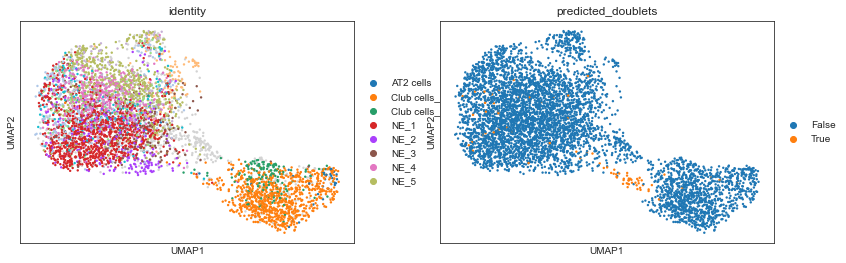

In [16]:
sc.pl.umap(adata, color = ['identity', 'predicted_doublets'])

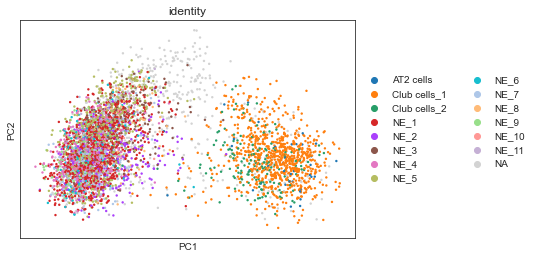

In [17]:
sc.pl.pca(adata, color = 'identity')

## Filter AnnData to Debbie's subset

In [18]:
adata.obs.identity.describe()

count     4388
unique      14
top       NE_1
freq      1023
Name: identity, dtype: object

In [19]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5165 entries, gex_possorted_bam_1WGCZ:AAATGGCCATTGTCAGx to gex_possorted_bam_1WGCZ:TTTGTGAAGTAAACCCx
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   doublet_scores           5165 non-null   float64 
 1   predicted_doublets       5165 non-null   category
 2   initial_size_spliced     5165 non-null   uint64  
 3   initial_size_unspliced   5165 non-null   uint64  
 4   initial_size             5165 non-null   float32 
 5   n_counts                 5165 non-null   float32 
 6   M                        5165 non-null   float64 
 7   E                        5165 non-null   float64 
 8   clusters_gradients       5165 non-null   category
 9   S_score                  5165 non-null   float64 
 10  G2M_score                5165 non-null   float64 
 11  phase                    5165 non-null   category
 12  cell_cycle_diff          5165 non-null   float

This shows that my analysis from Notebook 1a had 5165 cells, whereas adding the information from Debbie's analysis gave info for 4388 cells. We will subset the data to match hers below.

In [20]:
adata = adata[adata.obs.dropna().index,]

In [21]:
adata

View of AnnData object with n_obs × n_vars = 4388 × 15728
    obs: 'doublet_scores', 'predicted_doublets', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'brcd', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'barcode', 'sample', 'ATAC_snn_res.0.5', 'seurat_clusters', 'nCount_peaks', 'nFeature_peaks', 'peaks_snn_res.0.5', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'SCT.weight', 'peaks.weight', 'nCount_Imputed_counts', 'nFeature_Imputed_counts', 'nCount_gene_activity', 'nFeature_gene_activity', 'NE_score1', 'identity', 'non.NE_score1', 'comb.score', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'wsnn_res.0.5'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'mito', 'pct_dropout_by_counts', 'ambient'
    uns: 'clus

In [22]:
adata.write_h5ad('../../data/M2/adata_01_filtered.h5ad')

## Add Debbie's UMAP

Add the UMAP coordinates from Debbie's analysis, which was generated after Harmony correcting M1 and M2 for both ATAC (on lsi reduction of peaks data, harmony_1) and RNA (on SCTransformed data, harmony_2), and then using scATAC and scRNA together (via Multimodal Neighbor Analysis in Seurat, WNN).

In [23]:
umap = pd.read_csv('debbie_umap.csv', header = 0, index_col=0)

In [24]:
umap_1 = umap.loc[[i for i in umap.index if i[-1] == '1']]
umap_2 = umap.loc[[i for i in umap.index if i[-1] == '2']]

In [25]:
umap_2.index = [i[:-2] for i in umap_2.index]

In [26]:
umap_2

,wnnumap_1,wnnumap_2
AAACAGCCACAGGGAC,-7.870077,1.938419
AAACAGCCATGCATAT,-4.900531,-2.904787
AAACATGCAAGGTAAC,-5.477030,1.144867
AAACATGCACCTAAGC,-5.913084,-1.707036
AAACATGCAGCCTAAC,-4.035572,-3.824489
...,...,...
TTTGTGAAGTAAACCC,-6.056884,-1.728760
TTTGTGGCATGGCCCA,-7.845297,-1.058972
TTTGTGTTCCTTAGGG,-7.940131,2.205287
TTTGTGTTCGGCCATA,-7.056906,-2.121831


In [27]:
umap_list_x = []
umap_list_y = []


for i, r in adata.obs.iterrows():
    adata_label = i.split(':')[1][:-1]
    if adata_label in umap_2.index:
        umap_list_x.append(umap_2.loc[adata_label,'wnnumap_1'])
        umap_list_y.append(umap_2.loc[adata_label,'wnnumap_2'])


In [28]:
umap_2 = np.array([umap_list_x, umap_list_y]).T

In [29]:
adata.obsm['X_umap_wnn'] = umap_2

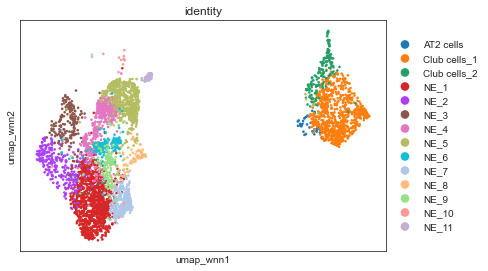

In [31]:
sc.pl.scatter(adata, basis = "umap_wnn", color = "identity")

In [32]:
adata.write_h5ad('../../data/M2/adata_01_filtered.h5ad')